In [1]:
# Import dependencies
import os
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

C:\Users\winth\Anaconda3\envs\PythonData\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# List of playlist names
playlists = ["todays_top_hits", "rap_caviar", "mint", "rock_this", "are_and_be",
             "viva_latino", "hot_country", "new_music_friday_malaysia",
             "viral_hits", "fresh_finds", "global_top_50", "united_states_top_50",
             "global_viral_50", "united_states_viral_50"]

# Initialize empty data frame
sentiment_df = pd.DataFrame()

# Iterate through playlists
for playlist in playlists:
    # Read in playlist .csv file
    print(f"Playlist: {playlist}")
    print("------------------------")
    pl_csv_path = f"../Data_Files/Play_Lists/{playlist}.csv"
    pl_csv = pd.read_csv(pl_csv_path)
    pl_csv = pl_csv.drop("Unnamed: 0", axis = 1)

    # Add columns for sentiment scoring
    pl_csv["compound"] = ""
    pl_csv["negative"] = ""
    pl_csv["neutral"] = ""
    pl_csv["positive"] = ""

    for index, row in pl_csv.iterrows():
        # Get path to lyrics file
        lyrics_path = pl_csv.loc[index, 'Lyrics Path']
        lyrics_path = lyrics_path[3:]  # This can be removed when Genius API script is updated

        # Open lyrics file, convert to list
        lyrics = pd.read_table(lyrics_path, names = ["Lyrics"])
        lyrics = lyrics["Lyrics"].values.tolist()

        # New list with entries starting with '[' removed
        lyrics = [lyric for lyric in lyrics if not lyric.startswith('[')]

        # Create a lyric frame with sentiment score for each line in each song
        print(f"Sentiment score for {pl_csv.loc[index, 'Track Name']} by {pl_csv.loc[index, 'Artist Name']}")

        # Initialize empty lists
        line = []
        compound = []
        neg = []
        neu = []
        pos = []

        # For each line of each song
        for lyric in lyrics:
            # Calculate sentiment score for the line
            ss = sid.polarity_scores(lyric)

            # Append scores to list
            line.append(lyric)
            compound.append(ss['compound'])
            neg.append(ss['neg'])
            neu.append(ss['neu'])
            pos.append(ss['pos'])

        # Create data frame with sentiment scores for each line
        lyric_frame = pd.DataFrame({"Line": line,
                                    "compound": compound,
                                    "negative": neg,
                                    "neutral": neu,
                                    "positive": pos})

        # Take means and store in data frame
        pl_csv.loc[index, 'compound'] = lyric_frame['compound'].mean()
        pl_csv.loc[index, 'negative'] = lyric_frame['negative'].mean()
        pl_csv.loc[index, 'neutral'] = lyric_frame['neutral'].mean()
        pl_csv.loc[index, 'positive'] = lyric_frame['positive'].mean()

        # Save .csv with data
        pl_csv.to_csv(f"../Data_Files/Play_Lists/{playlist}_SentimentScore.csv")
        print()
        
        # Append to full data frame
        sentiment_df = sentiment_df.append(pl_csv)

Playlist: todays_top_hits
------------------------
Sentiment score for Happier by Marshmello

Sentiment score for Eastside (with Halsey & Khalid) by benny blanco

Sentiment score for Be Alright by Dean Lewis

Sentiment score for Whenever (feat. Conor Maynard) by Kris Kross Amsterdam

Sentiment score for Promises (with Sam Smith) by Calvin Harris

Sentiment score for breathin by Ariana Grande

Sentiment score for Natural by Imagine Dragons

Sentiment score for No Brainer by DJ Khaled

Sentiment score for Lucky You (feat. Joyner Lucas) by Eminem

Sentiment score for Happy Now by Zedd

Sentiment score for Beautiful (feat. Camila Cabello) by Bazzi

Sentiment score for Thunderclouds with Sia, Diplo & Labrinth by Sia

Sentiment score for In My Mind by Dynoro

Sentiment score for Body by Loud Luxury

Sentiment score for Feels Like Summer by Childish Gambino

Sentiment score for Tie Me Down (with Elley Duhé) by Gryffin

Sentiment score for Girls Like You (feat. Cardi B) by Maroon 5

Sentiment 

Sentiment score for Sunrise by ARTY

Sentiment score for Nothing Scares Me Anymore by Steve Angello

Sentiment score for Alone (Calvin Harris Remix) (Feat. Stefflon Don) by Halsey

Sentiment score for Flames - David Guetta Remix by David Guetta

Sentiment score for I Wanna Know by RL Grime

Sentiment score for Ultimatum - Edit by Disclosure

Sentiment score for Turn off the Lights (feat. Alexis Roberts) by Chris Lake

Sentiment score for Wake Me Up - Radio Edit by Avicii

Sentiment score for Real Life by Duke Dumont

Sentiment score for You Be Love (feat. Billy Raffoul) by Avicii

Playlist: rock_this
------------------------
Sentiment score for MANTRA by Bring Me The Horizon

Sentiment score for Forever & Ever More by Nothing But Thieves

Sentiment score for Natural by Imagine Dragons

Sentiment score for Jumpsuit by Twenty One Pilots

Sentiment score for The Dark Side by Muse

Sentiment score for Blood / / Water by grandson

Sentiment score for When The Curtain Falls by Greta Van Flee

Sentiment score for Speechless by Dan + Shay

Sentiment score for Good Girl by Dustin Lynch

Sentiment score for More by Clare Dunn

Sentiment score for Simple by Florida Georgia Line

Sentiment score for Hangin' On by Chris Young

Sentiment score for Never Comin Down - Radio Single Mix by Keith Urban

Sentiment score for Caught Up In The Country by Rodney Atkins

Sentiment score for Drowns The Whiskey (feat. Miranda Lambert) by Jason Aldean

Sentiment score for Good Together by James Barker Band

Sentiment score for She Got the Best of Me by Luke Combs

Sentiment score for Heaven by Kane Brown

Sentiment score for I Hate Love Songs by Kelsea Ballerini

Sentiment score for Best Shot by Jimmie Allen

Sentiment score for Downtown's Dead by Sam Hunt

Sentiment score for Never Comin Down by Keith Urban

Sentiment score for Leave Right Now by Thomas Rhett

Sentiment score for Born to Love You by LANCO

Sentiment score for Take Back Home Girl (Feat. Tori Kelly) by Chris Lane

Sentiment score


Sentiment score for Girls Like You (feat. Cardi B) by Maroon 5

Sentiment score for FEFE (feat. Nicki Minaj & Murda Beatz) by 6ix9ine

Sentiment score for SICKO MODE by Travis Scott

Sentiment score for Promises (with Sam Smith) by Calvin Harris

Sentiment score for In My Mind by Dynoro

Sentiment score for Happier by Marshmello

Sentiment score for Fall by Eminem

Sentiment score for Lucid Dreams by Juice WRLD

Sentiment score for Greatest by Eminem

Sentiment score for Not Alike (feat. Royce Da 5'9) by Eminem

Sentiment score for No Brainer by DJ Khaled

Sentiment score for Taste (feat. Offset) by Tyga

Sentiment score for God is a woman by Ariana Grande

Sentiment score for Kamikaze by Eminem

Sentiment score for Be Alright by Dean Lewis

Sentiment score for breathin by Ariana Grande

Sentiment score for I Like It by Cardi B

Sentiment score for SAD! by XXXTENTACION

Sentiment score for Vaina Loca by Ozuna

Sentiment score for Body (feat. brando) by Loud Luxury

Sentiment score for


Sentiment score for Can’t Help Falling in Love by Kina Grannis

Sentiment score for Dancing in the Moonlight by Jubel

Sentiment score for You Say by Lauren Daigle

Sentiment score for FEFE (feat. Nicki Minaj & Murda Beatz) by 6ix9ine

Sentiment score for Trip by Ella Mai

Sentiment score for In My Mind by Dynoro

Sentiment score for Beautiful (feat. Camila Cabello) by Bazzi

Sentiment score for GIGI (ZKITTLEZ) by Gringo

Sentiment score for Taking A Walk by Trippie Redd

Sentiment score for Losing It by FISHER

Sentiment score for Barbie Dreams by Nicki Minaj

Sentiment score for Natural by Imagine Dragons

Sentiment score for On My Way to You by Cody Johnson

Sentiment score for Mala Mía by Maluma

Sentiment score for No Brainer by DJ Khaled

Sentiment score for Body (feat. brando) by Loud Luxury

Sentiment score for All Night Long by JST FRNDS

Sentiment score for High On Life (feat. Bonn) by Martin Garrix

Sentiment score for Sax to Me by Dj Seven

Sentiment score for broken by lo

In [3]:
# Is this right?? Will this fuck up our d a t a ????
# Tmrw: investigate where this wonky stuff is coming from
sentiment_df['compound'] = sentiment_df['compound'].replace("", 0)
sentiment_df['negative'] = sentiment_df['negative'].replace("", 0)
sentiment_df['neutral'] = sentiment_df['neutral'].replace("", 0)
sentiment_df['positive'] = sentiment_df['positive'].replace("", 0)

means = sentiment_df.groupby("Playlist")
means = means.mean()

sem = sentiment_df.groupby("Playlist")
sem = sem.sem()

visual = pd.merge(means, sem, on = "Playlist")
visual = visual[["compound_x", "compound_y"]]
visual = visual.rename(columns = {"compound_x": "mean",
                                  "compound_y": "sem"})
#


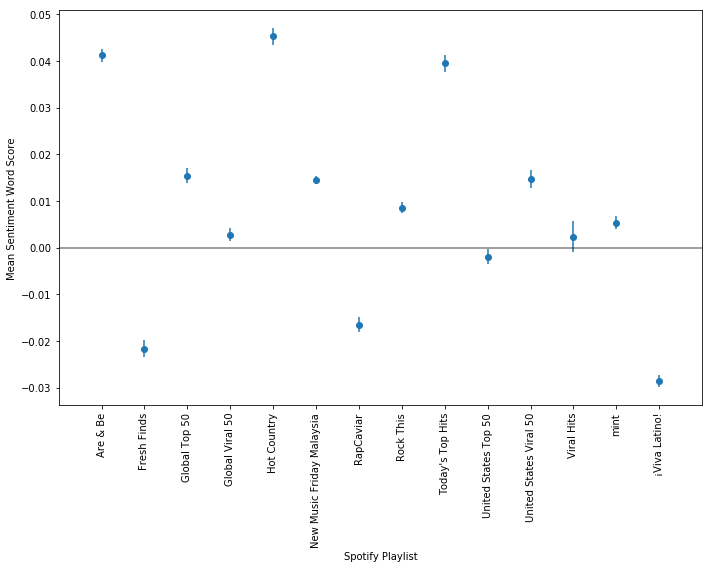

In [9]:
# Visualize
fig, ax = plt.subplots(figsize = (10, 8))

ax.errorbar(np.arange(len(means)),
            visual['mean'],
            visual['sem'],
            fmt = "o")
ax.set_xlim(-1, len(means))
ax.set_xlabel("Spotify Playlist")
ax.set_ylabel("Mean Sentiment Word Score")

plt.hlines(0, -1, len(means), alpha = .5)
plt.xticks(np.arange(len(means)),
           visual.index.tolist(),
           rotation = 90)
plt.tight_layout()